In [3]:
import pandas as pd

endpoint = "/mnt/d/Germany/JobHunt/Niologic/Seattle_Real_Time_Fire_911_Calls.csv"
df = pd.read_csv(endpoint)
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%m/%d/%Y %I:%M:%S %p")


In [4]:
df

,Address,Type,Datetime,Latitude,Longitude,Report Location,Incident Number
0,904 7th Av,Car Fire,2019-05-22 12:55:00,47.606900,-122.329051,POINT (-122.329051 47.6069),F190051945
1,9610 53rd Av S,Aid Response,2019-05-22 12:55:00,47.515984,-122.266529,POINT (-122.266529 47.515984),F190051946
2,106 Pike St,Aid Response,2019-05-22 12:57:00,47.608849,-122.339945,POINT (-122.339945 47.608849),F190051950
3,1902 2nd Av,Aid Response,2019-07-01 07:45:00,47.610972,-122.340465,POINT (-122.340465 47.610972),F190068848
4,4737 Roosevelt Way Ne,Unk Odor,2019-07-01 07:45:00,47.663338,-122.317421,POINT (-122.317421 47.663338),F190068849
...,...,...,...,...,...,...,...
1711094,4107 Sw Charlestown St,Medic Response,2022-08-21 16:42:00,47.570182,-122.384188,POINT (-122.384188 47.570182),F220101009
1711095,Airport Way S / S Spokane St,Aid Response,2022-08-21 14:55:00,47.571399,-122.322746,POINT (-122.322746 47.571399),F220100976
1711096,MONTLAKE BLVD E / E HAMLIN ST,Brush Fire,2022-08-21 15:06:00,47.645557,-122.304611,POINT (-122.304611 47.645557),F220100977
1711097,9239 FREMONT AVE N,Investigate Out Of Service,2022-08-21 15:10:00,47.696235,-122.349979,POINT (-122.349979 47.696235),F220100979


In [9]:
df_meta = df.drop(columns = [ "Address","Report Location","Incident Number"], inplace = False).sort_values(by="Datetime",ascending=True)

df_alpha = df_meta[(df_meta['Datetime'] >= '2017-01-01') ]
target = df_alpha.groupby([pd.Grouper(key='Datetime',freq='H')]).size().reset_index(name='target')
target = target.set_index("Datetime")

<function matplotlib.pyplot.show(close=None, block=None)>

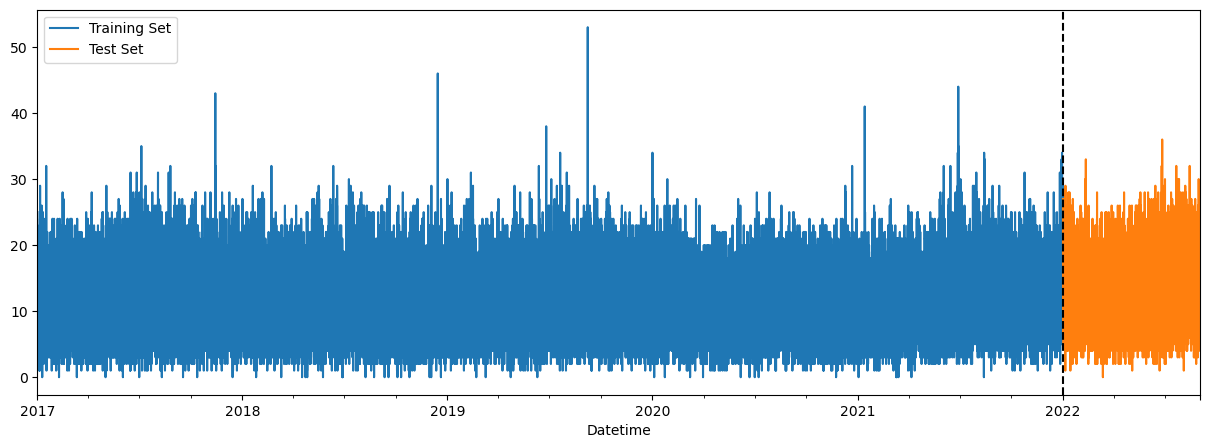

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


color_pal = sns.color_palette()
train = target.loc[target.index < '2022-01-01']
test = target.loc[target.index >= '2022-01-01']
fig, az = plt.subplots(figsize=(15,5))
train.plot(ax = az,label = "tr")
test.plot(ax = az,label = "te")
az.axvline('01-01-2022', color='black', ls='--')
az.legend(['Training Set', 'Test Set'])
plt.show

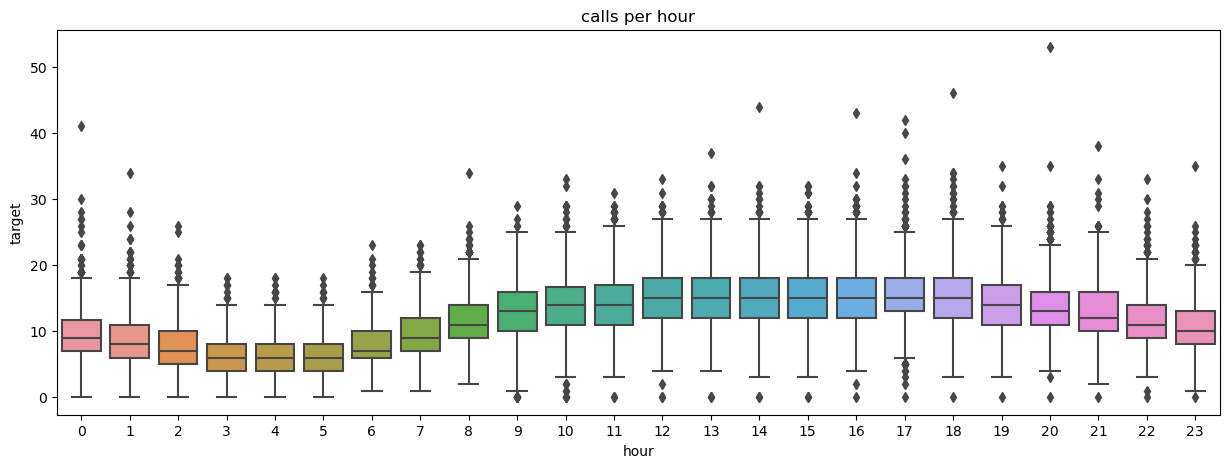

In [7]:
target["hour"] = target.index.hour
target["dayoftheweek"] = target.index.day_of_week
target["month"] = target.index.month
target["dayofyear"] = target.index.day_of_year
target["seasonofyear"] = target.index.quarter

fig , ax = plt.subplots(figsize = (15,5))
sns.boxplot(data = target, x = "hour", y="target")
ax.set_title("calls per hour")
plt.show()

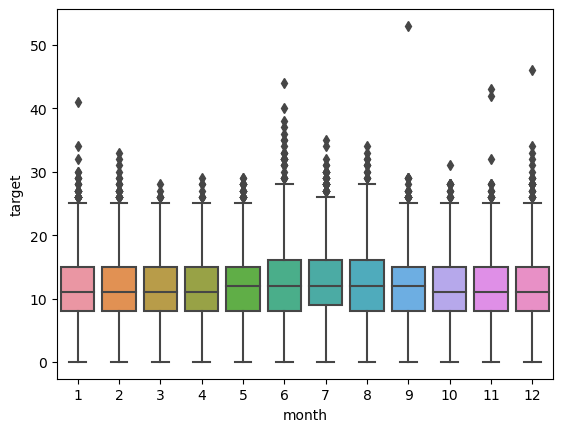

In [8]:
sns.boxplot(data = target, x = "month", y = "target")
ax.set_title("calls per month")
plt.show()

In [ ]:
sns.lmplot(x='Longitude', y='Latitude', hue='Type', 
           data=df_alpha, 
           fit_reg=False)

In [ ]:
sns.lmplot(x='Longitude', y='Latitude', hue='Type', 
           data=df_alpha, 
           fit_reg=False)

In [154]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly

# Set time period
start = datetime(2017, 1, 1,0,0,0)
end = datetime(2022, 9, 1,23,59,59)

# Create Point for Vancouver, BC
seattle = Point(47.6062, -122.3321)

# Get daily data for 2018
data = Hourly(seattle, start, end)
data = data.fetch()
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2017-01-01 00:00:00,2.2,1.0,92.0,NaN,NaN,170.0,16.6,NaN,1013.1,NaN,7.0
2017-01-01 01:00:00,4.4,3.4,93.0,0.0,NaN,190.0,18.4,NaN,1010.5,NaN,NaN
2017-01-01 02:00:00,3.9,3.3,96.0,0.5,NaN,200.0,20.5,NaN,1009.3,NaN,NaN
2017-01-01 03:00:00,3.9,3.3,96.0,NaN,NaN,200.0,11.2,NaN,1008.1,NaN,NaN
2017-01-01 04:00:00,3.9,2.9,93.0,0.0,NaN,260.0,11.2,NaN,1007.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01 19:00:00,18.3,15.0,81.0,0.0,NaN,220.0,5.4,NaN,1017.2,NaN,1.0
2022-09-01 20:00:00,21.0,16.0,73.0,0.0,NaN,306.0,4.3,NaN,1017.0,NaN,1.0
2022-09-01 21:00:00,23.0,15.3,62.0,0.0,NaN,250.0,6.0,NaN,1016.0,NaN,1.0


In [155]:
target["temp"] = data.loc[:]["temp"]
target["wspd"] = data.loc[:]["wspd"]


In [156]:
target

,target,hour,dayoftheweek,month,dayofyear,seasonofyear,temp,wspd
Datetime,,,,,,,,
2017-01-01 00:00:00,25,0,6,1,1,1,2.2,16.6
2017-01-01 01:00:00,24,1,6,1,1,1,4.4,18.4
2017-01-01 02:00:00,18,2,6,1,1,1,3.9,20.5
2017-01-01 03:00:00,18,3,6,1,1,1,3.9,11.2
2017-01-01 04:00:00,10,4,6,1,1,1,3.9,11.2
...,...,...,...,...,...,...,...,...
2022-09-01 19:00:00,16,19,3,9,244,3,18.3,5.4
2022-09-01 20:00:00,19,20,3,9,244,3,21.0,4.3
2022-09-01 21:00:00,8,21,3,9,244,3,23.0,6.0


In [157]:
train = target.loc[target.index < '2022-01-01']
test = target.loc[target.index >= '2022-01-01']

In [160]:
FEATURES = ['hour',	'dayoftheweek','month','dayofyear','seasonofyear','temp','wspd']
TARGET = 'target'

In [161]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [200]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# reg = xgb.XGBRegressor(n_estimators = 1000)
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=20,
                       objective='reg:linear',
                       max_depth=4,
                       learning_rate=0.99)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[20:33:16] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:33:16] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:3.87751	validation_1-rmse:4.46500


[100]	validation_0-rmse:3.51102	validation_1-rmse:4.34000
[200]	validation_0-rmse:3.39990	validation_1-rmse:4.36098
[300]	validation_0-rmse:3.31014	validation_1-rmse:4.38277
[400]	validation_0-rmse:3.23975	validation_1-rmse:4.42325
[500]	validation_0-rmse:3.17715	validation_1-rmse:4.46585
[600]	validation_0-rmse:3.12022	validation_1-rmse:4.49298
[700]	validation_0-rmse:3.07157	validation_1-rmse:4.50890
[800]	validation_0-rmse:3.02776	validation_1-rmse:4.52935
[900]	validation_0-rmse:2.98112	validation_1-rmse:4.54378
[999]	validation_0-rmse:2.93906	validation_1-rmse:4.57076


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=20,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.99, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [201]:
# fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
# plt.show()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


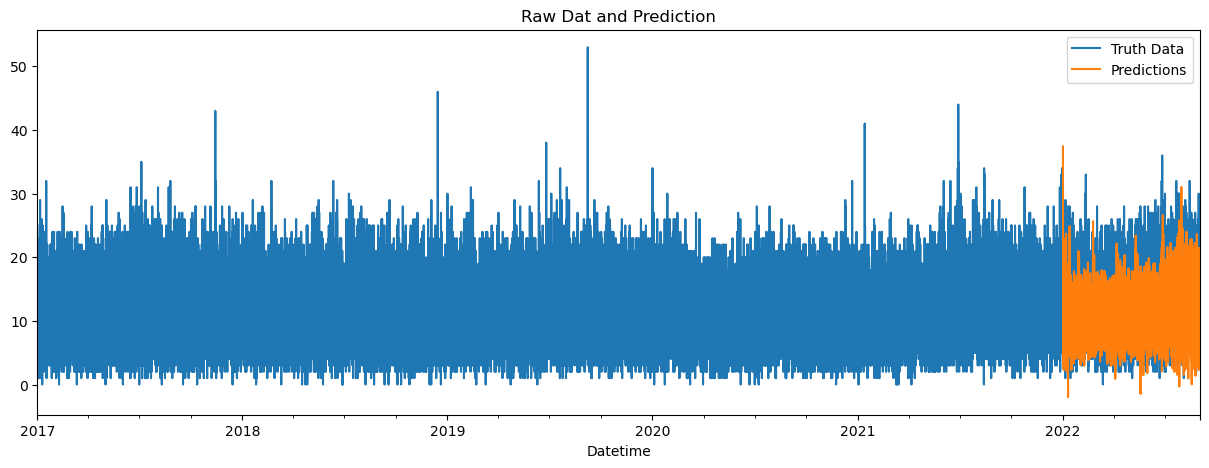

In [202]:
test['prediction'] = reg.predict(X_test)
target_test = target.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = target[['target']].plot.line(figsize=(15, 5))
target_test['prediction'].plot.line(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

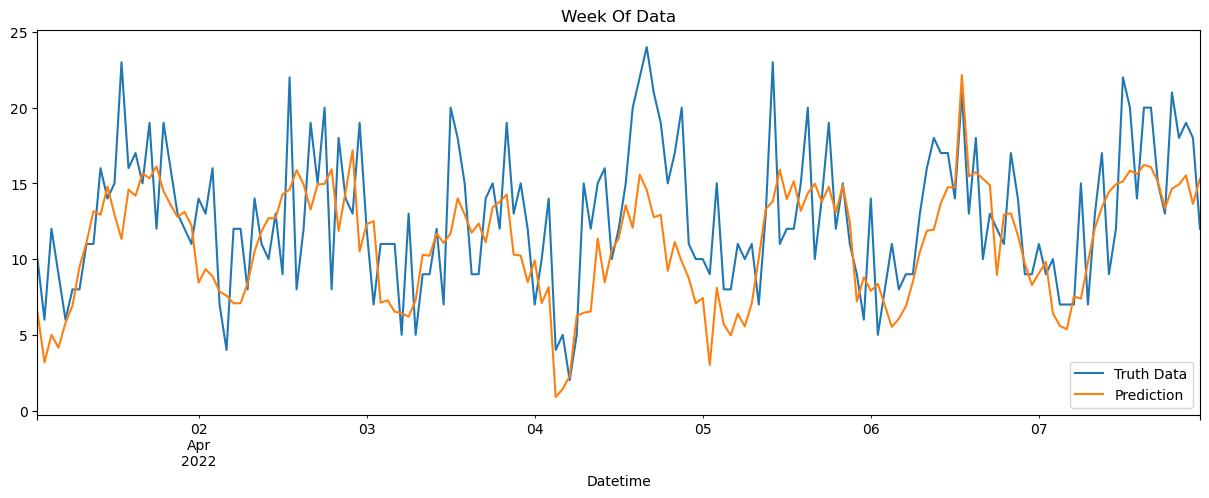

In [203]:
ax = target_test.loc[(target_test.index > '04-01-2022') & (target_test.index < '04-08-2022')]['target'] \
    .plot(figsize=(15, 5), title='Week Of Data')
target_test.loc[(target_test.index > '04-01-2022') & (target_test.index < '04-08-2022')]['prediction'] \
    .plot.line()
plt.legend(['Truth Data','Prediction'])
plt.show()

In [204]:
target_test

,target,hour,dayoftheweek,month,dayofyear,seasonofyear,temp,wspd,prediction
Datetime,,,,,,,,,
2017-01-01 00:00:00,25,0,6,1,1,1,2.2,16.6,NaN
2017-01-01 01:00:00,24,1,6,1,1,1,4.4,18.4,NaN
2017-01-01 02:00:00,18,2,6,1,1,1,3.9,20.5,NaN
2017-01-01 03:00:00,18,3,6,1,1,1,3.9,11.2,NaN
2017-01-01 04:00:00,10,4,6,1,1,1,3.9,11.2,NaN
...,...,...,...,...,...,...,...,...,...
2022-09-01 19:00:00,16,19,3,9,244,3,18.3,5.4,15.119147
2022-09-01 20:00:00,19,20,3,9,244,3,21.0,4.3,14.668866
2022-09-01 21:00:00,8,21,3,9,244,3,23.0,6.0,13.948130


In [205]:
import numpy as np
score = np.sqrt(mean_squared_error(test['target'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4.57


In [206]:
test['error'] = np.abs(test['target'] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


date
2022-01-16    6.146784
2022-01-01    5.936975
2022-04-08    5.919801
2022-01-10    5.793427
2022-07-25    5.658128
2022-01-05    5.439072
2022-07-21    5.328865
2022-05-21    5.186357
2022-06-17    5.162331
2022-01-02    5.116914
Name: error, dtype: float64

## -------------------------Rough Work---------------------------------

In [207]:
"""# df_alpha[["temperature"]]  
df_alpha = df_meta[(df_meta['Datetime'] > '2017-01-01') & (df['Datetime'] < '2022-09-01')]
df_alpha = df_alpha.set_index("Datetime")


df_alpha = df_alpha.reindex(columns=["Type","Latitude","Longitude","Temperature"])
df_alpha
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Hourly
from datetime import timedelta

for i in range(len(df_alpha)):
    lat = df_alpha.iloc[i][1].copy()
    lon = df_alpha.iloc[i][2].copy()
    p = Point(lat, lon)

    year = df_alpha.index[i].year
    month = df_alpha.index[i].month
    day = df_alpha.index[i].day
    hour = df_alpha.index[i].hour
    minute = df_alpha.index[i].minute
    second = df_alpha.index[i].second

    end_time = df_alpha.index[i] + timedelta(hours = 1)
    new_year = end_time.year
    new_month = end_time.month
    new_day = end_time.day
    new_hour = end_time.hour
    new_minute = end_time.minute
    new_second = end_time.second

    l =  Hourly(p,datetime(year,month, day,hour,minute,second),datetime(new_year,new_month, new_day,new_hour,new_minute,new_second))
    l=l.fetch()
    ll = l["temp"]
    df_alpha.loc[df_alpha.index.values[i],'Temperature'] = ll.to_numpy()[0]
df_alpha.to_csv("/mnt/d/Germany/JobHunt/Niologic/df_alpha.csv")
df_alpha["Weather Data"] = Daily(df["Latitude","Longitude"], df)

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()"""

'# df_alpha[["temperature"]]  \ndf_alpha = df_meta[(df_meta[\'Datetime\'] > \'2017-01-01\') & (df[\'Datetime\'] < \'2022-09-01\')]\ndf_alpha = df_alpha.set_index("Datetime")\n\n\ndf_alpha = df_alpha.reindex(columns=["Type","Latitude","Longitude","Temperature"])\ndf_alpha\nfrom datetime import datetime\nimport matplotlib.pyplot as plt\nfrom meteostat import Point, Daily, Hourly\nfrom datetime import timedelta\n\nfor i in range(len(df_alpha)):\n    lat = df_alpha.iloc[i][1].copy()\n    lon = df_alpha.iloc[i][2].copy()\n    p = Point(lat, lon)\n\n    year = df_alpha.index[i].year\n    month = df_alpha.index[i].month\n    day = df_alpha.index[i].day\n    hour = df_alpha.index[i].hour\n    minute = df_alpha.index[i].minute\n    second = df_alpha.index[i].second\n\n    end_time = df_alpha.index[i] + timedelta(hours = 1)\n    new_year = end_time.year\n    new_month = end_time.month\n    new_day = end_time.day\n    new_hour = end_time.hour\n    new_minute = end_time.minute\n    new_second = en